In [16]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1. Data

size information : 100 X 100, color channel: 3


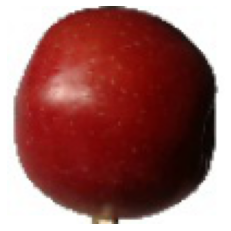

In [164]:
# 1. Data overview
dir_path = "./datas/fruits 360{}"

ls = os.listdir(dir_path.format("/Apple"))
image = mpimg.imread(dir_path.format("/Apple/") + ls[0])

width, height, color_channel = image.shape
print("size information : {} X {}, color channel: {}".format(width, height, color_channel))

plt.imshow(image)
plt.axis("off")
plt.show()

In [117]:
# 2. Datas Import
fruits = []
labels = []

class_names = ["Apple", "Banana", "Pineapple"]
for class_name in class_names:
    ls = os.listdir(dir_path.format(class_name))
    
    for file_name in ls:
        image = mpimg.imread(dir_path.format(class_name) + "/{}".format(file_name))
        fruits.append(image)
        labels.append(class_name)
        
fruits = np.array(fruits)
labels = np.array(labels)

data_count, width, height, color_channel = fruits.shape
print("data count : {}".format(data_count))
print("size information : {} X {}, color channel: {}".format(width, height, color_channel))

data count : 1470
size information : 100 X 100, color channel: 3


In [166]:
import tensorflow as tf
from tensorflow import keras
import collections
from sklearn.model_selection import train_test_split

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dir_path.format(""),
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(100,100),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dir_path.format(""),
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(100,100),
  batch_size=batch_size)

Found 1470 files belonging to 3 classes.
Using 1176 files for training.
Found 1470 files belonging to 3 classes.
Using 294 files for validation.


In [176]:
np.isin(val_ds.file_paths == train_ds.file_paths)

TypeError: _isin_dispatcher() missing 1 required positional argument: 'test_elements'

In [190]:
from tensorflow.keras.applications.vgg16 import VGG16

In [191]:
vgg = VGG16()

vgg.summary()

553476096/553467096 [==============================] - 48s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [203]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filters, bias = layer.get_weights()
    print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)


In [204]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [194]:
filters , bias = vgg.layers[1].get_weights()

In [196]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

filters.shape

(3, 3, 3, 64)

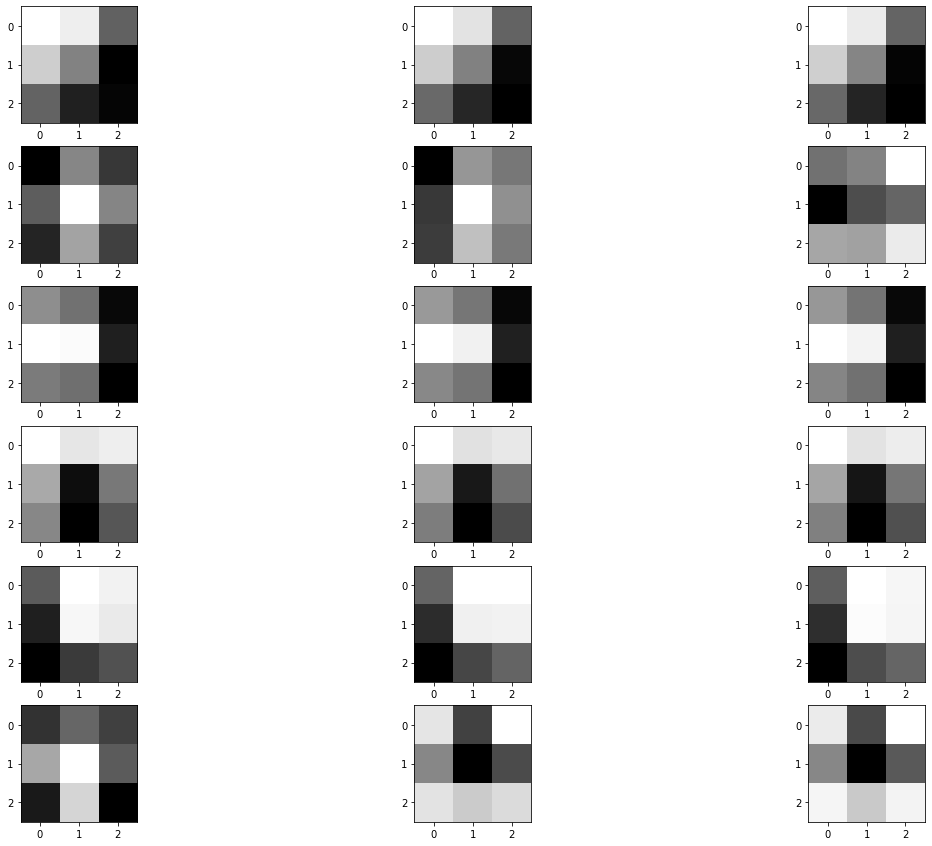

In [198]:
n_filters = 6
ix = 1

fig = plt.figure(figsize=(20,15))
for i in range(n_filters):
    f = filters[:,:,:,i]
    for j in range(3):
        plt.subplot(n_filters, 3, ix)
        plt.imshow(f[:,:,j], cmap='gray')
        ix += 1
        
plt.show()

In [199]:
for i in range(len(vgg.layers)):
    layer = vgg.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


In [201]:
model = keras.models.Model(inputs=vgg.inputs , outputs=vgg.layers[1].output)

In [202]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filters, bias = layer.get_weights()
    print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)


In [146]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# 최댓값인 255를 기준으로 표준화 시켜준다.
print(np.min(first_image), np.max(first_image))

0.9568628 1.0


In [157]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "./datas/fruits 360",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(100,100),
  batch_size=batch_size)

Found 1470 files belonging to 3 classes.
Using 1176 files for training.


<BatchDataset shapes: ((None, 100, 100, 3), (None,)), types: (tf.float32, tf.int32)>

In [205]:
num_classes = len(class_names)

model = keras.Sequential([
  keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(height, width, 3), name="normalization"),
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes)
], name="image_classification")

model.summary()

Model: "image_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Rescaling)   (None, 100, 100, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 25, 25, 64

In [206]:
# 2. compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [207]:
# 3. model fitting
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
37/37 [==============================] - 6s 153ms/step - loss: 0.1578 - accuracy: 0.9311 - val_loss: 6.4869e-05 - val_accuracy: 1.0000
Epoch 2/10
37/37 [==============================] - 4s 98ms/step - loss: 1.3692e-05 - accuracy: 1.0000 - val_loss: 4.5931e-06 - val_accuracy: 1.0000
Epoch 3/10
37/37 [==============================] - 5s 127ms/step - loss: 3.1949e-06 - accuracy: 1.0000 - val_loss: 3.1947e-06 - val_accuracy: 1.0000
Epoch 4/10
37/37 [==============================] - 4s 106ms/step - loss: 2.5634e-06 - accuracy: 1.0000 - val_loss: 2.7710e-06 - val_accuracy: 1.0000
Epoch 5/10
37/37 [==============================] - 4s 114ms/step - loss: 2.3078e-06 - accuracy: 1.0000 - val_loss: 2.5674e-06 - val_accuracy: 1.0000
Epoch 6/10
37/37 [==============================] - 4s 112ms/step - loss: 2.1551e-06 - accuracy: 1.0000 - val_loss: 2.4093e-06 - val_accuracy: 1.0000
Epoch 7/10
37/37 [==============================] - 4s 114ms/step - loss: 2.0302e-06 - accuracy: 1.0000 -

In [ ]:
# https://www.kaggle.com/code/arpitjain007/guide-to-visualize-filters-and-feature-maps-in-cnn

In [211]:
filters, bias = model.layers[1].get_weights()

f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

In [217]:
filters[:, :, :, 5]

array([[[0.71800315, 0.5987425 , 0.33576918],
        [0.5682376 , 0.6208708 , 0.2099171 ],
        [0.3857402 , 0.96540797, 0.42125717]],

       [[0.2736437 , 0.49803212, 0.46612918],
        [0.5874079 , 0.720484  , 0.6739992 ],
        [0.7014349 , 0.35943314, 0.6989021 ]],

       [[0.13506667, 0.14842695, 0.67084736],
        [0.3042291 , 0.7095296 , 0.15171343],
        [0.6041431 , 0.47263253, 0.19866605]]], dtype=float32)

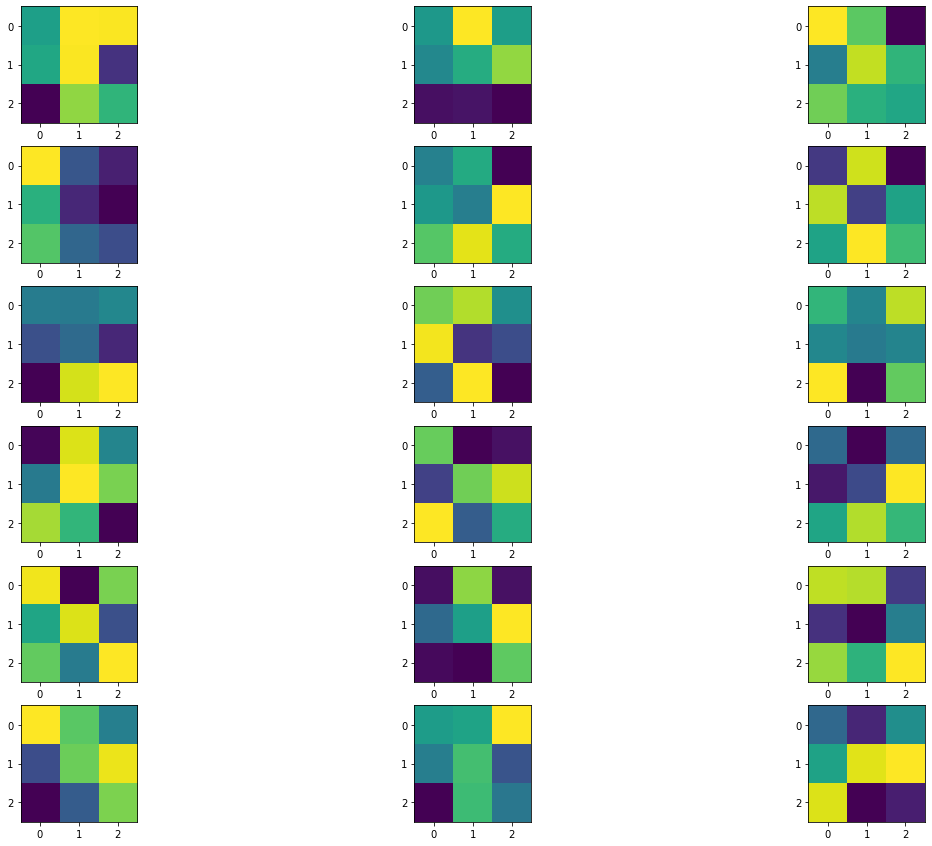

In [218]:
n_filters = 6
ix = 1

fit = plt.figure(figsize=(20, 15))
for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(3):
        plt.subplot(n_filters, 3, ix)
        plt.imshow(f[:,:,j])
        ix += 1
        
plt.show()

In [219]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

1 conv2d_18 (None, 100, 100, 16)
3 conv2d_19 (None, 50, 50, 32)
5 conv2d_20 (None, 25, 25, 64)


In [222]:
feature_map = keras.models.Model(inputs=model.inputs , outputs=model.layers[1].output)

In [226]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from numpy import expand_dims

image = load_img(dir_path.format("/Apple/0_100.jpg"), target_size=(100, 100))

image = img_to_array(image)
image = expand_dims(image, axis=0)

In [227]:
features = feature_map.predict(image)

In [229]:
features.shape

(1, 100, 100, 16)

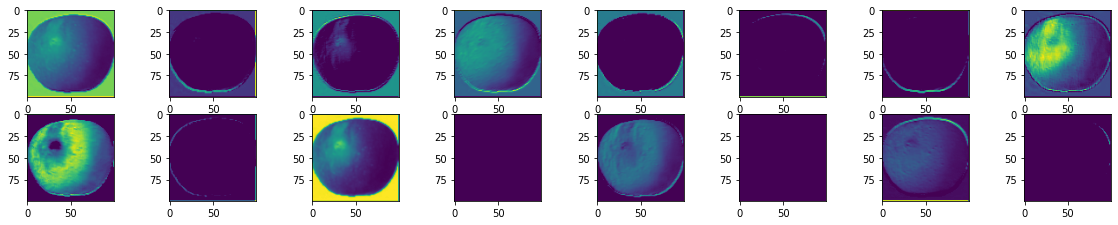

In [233]:
fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1])
    
plt.show()

In [237]:
blocks = []

for i, layer in enumerate(model.layers):
    if "conv" in layer.name:
        blocks.append(i)

In [238]:
blocks

[1, 3, 5]

In [240]:
outputs = [model.layers[i].output for i in blocks]
feature_map = keras.models.Model(inputs=model.inputs, outputs=outputs)

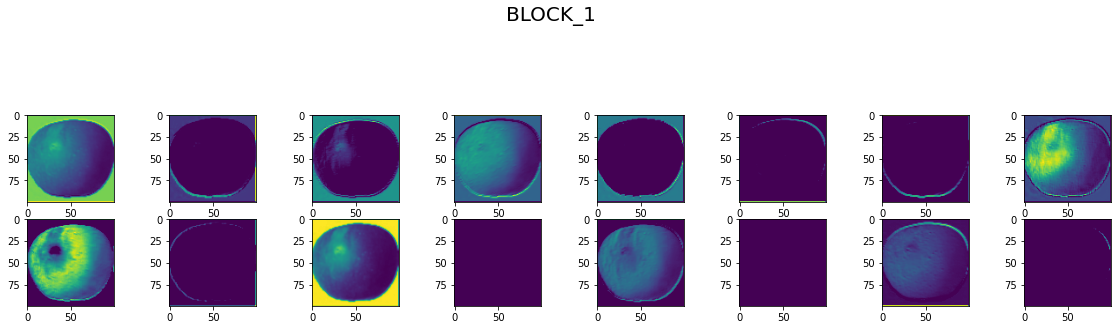

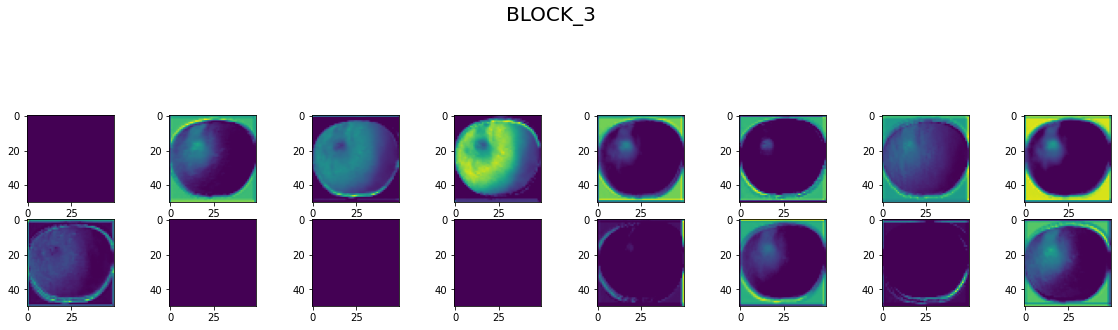

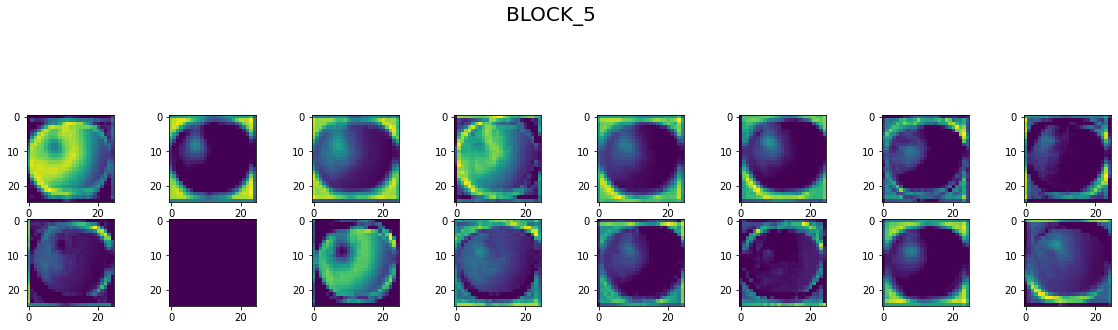

In [242]:
_feature_map = feature_map.predict(image)

for i, fmap in zip(blocks, _feature_map):
    fig = plt.figure(figsize=(20, 15))
    
    fig.suptitle("BLOCK_{}".format(i), fontsize=20)
    for i in range(1, features.shape[3] + 1):
        plt.subplot(8,8,i)
        plt.imshow(fmap[0, :,:,i-1])
        
    plt.show()

In [251]:
_feature_map[0].shape

(1, 100, 100, 16)

In [247]:
fmap[0, :,:,1].shape

(25, 25)